In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'C:\Users\no1mi\Downloads\nanum-all_new\나눔 글꼴\나눔고딕\NanumFontSetup_TTF_GOTHIC\NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
import warnings;warnings.filterwarnings('ignore')

In [5]:
# 1) 데이터 불러오기
df_customer_info = pd.read_csv('../data/Customer_info.csv', encoding='utf-8', low_memory=False)
df_discount_info = pd.read_csv('../data/Discount_info.csv', encoding='utf-8', low_memory=False)
df_marketing_info = pd.read_csv('../data/Marketing_info.csv', encoding='utf-8', low_memory=False)
df_onlinesales_info = pd.read_csv('../data/Onlinesales_info.csv', encoding='utf-8', low_memory=False)
df_tax_info = pd.read_csv('../data/Tax_info.csv', encoding='utf-8', low_memory=False)

In [36]:
print(df_customer_info.head(10))
print(df_discount_info.head(10))
print(df_marketing_info.head(10))
print(df_onlinesales_info.head(10))
print(df_tax_info.head(10))

        고객ID 성별        고객지역  가입기간
0  USER_1358  남     Chicago    12
1  USER_0190  남  California    43
2  USER_0066  남     Chicago    33
3  USER_0345  여  California    30
4  USER_0683  남  California    49
5  USER_0730  남  California    32
6  USER_0585  여    New York    46
7  USER_1347  여  New Jersey    24
8  USER_0736  여     Chicago    40
9  USER_0541  남  California    43
     월     제품카테고리     쿠폰코드  할인율
0  Jan    Apparel   SALE10   10
1  Feb    Apparel   SALE20   20
2  Mar    Apparel   SALE30   30
3  Jan   Nest-USA   ELEC10   10
4  Feb   Nest-USA   ELEC20   20
5  Mar   Nest-USA   ELEC30   30
6  Jan     Office    OFF10   10
7  Feb     Office    OFF20   20
8  Mar     Office    OFF30   30
9  Jan  Drinkware  EXTRA10   10
           날짜  오프라인비용    온라인비용
0  2019-01-01    4500  2424.50
1  2019-01-02    4500  3480.36
2  2019-01-03    4500  1576.38
3  2019-01-04    4500  2928.55
4  2019-01-05    4500  4055.30
5  2019-01-06    4500  3796.85
6  2019-01-07    4500  2579.52
7  2019-01-08    5000  255

In [11]:
df_onlinesales_info['제품카테고리'].unique()

array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
       'Notebooks & Journals', 'Headgear', 'Waze', 'Fun', 'Nest-Canada',
       'Backpacks', 'Google', 'Bottles', 'Gift Cards', 'More Bags',
       'Housewares', 'Android', 'Accessories', 'Nest'], dtype=object)

In [13]:
df_tax_info['제품카테고리'].unique()

array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
       'Notebooks & Journals', 'Headgear', 'Waze', 'Fun', 'Nest-Canada',
       'Backpacks', 'Google', 'Bottles', 'Gift Cards', 'More Bags',
       'Housewares', 'Android', 'Accessories', 'Nest'], dtype=object)

In [12]:
df_discount_info['제품카테고리'].unique()

array(['Apparel', 'Nest-USA', 'Office', 'Drinkware', 'Lifestyle', 'Bags',
       'Notebooks', 'Headgear', 'Nest', 'Waze', 'Bottles', 'Nest-Canada',
       'Housewares', 'Accessories', 'Gift Cards', 'Notebooks & Journals',
       'Android'], dtype=object)

In [27]:
category_map = {
    'Fun': 'Lifestyle',
    'More Bags': 'Bags',
    'Backpacks': 'Bags',
    'Google': 'Nest'
}

month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

In [ ]:
merge_df = pd.merge(
    pd.merge(df_onlinesales_info, df_customer_info, on='고객ID'),
    df_tax_info, on='제품카테고리'
)

In [28]:
merge_df['제품카테고리'] = merge_df['제품카테고리'].map(category_map).fillna(merge_df['제품카테고리'])
discount = df_discount_info[df_discount_info['제품카테고리'] != 'Notebooks']

In [29]:
merge_df['월'] = pd.to_datetime(merge_df['거래날짜']).dt.month
merge_df['월'] = merge_df['월'].map(month_map)

df = pd.merge(merge_df, discount, on = ['제품카테고리', '월'])

In [30]:
df['거래날짜'] = pd.to_datetime(df['거래날짜'])
df['거래금액'] = df.평균금액 * df.수량 * (1+df['GST']) + df.배송료

In [31]:
df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,월,쿠폰코드,할인율,거래금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10,175.581
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10,175.581
2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.5,Not Used,남,Chicago,12,0.10,Jan,ELEC10,10,276.594
3,USER_1358,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,81.50,6.5,Clicked,남,Chicago,12,0.10,Jan,ELEC10,10,96.150
4,USER_1358,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Clicked,남,Chicago,12,0.10,Jan,ELEC10,10,175.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0833,Transaction_13360,2019-07-28,Product_0910,Gift Cards,2,25.00,0.0,Not Used,여,Chicago,16,0.05,Jul,GC10,10,52.500
52920,USER_1302,Transaction_13382,2019-07-28,Product_0910,Gift Cards,1,25.00,0.0,Clicked,여,Chicago,32,0.05,Jul,GC10,10,26.250
52921,USER_1302,Transaction_13383,2019-07-28,Product_0910,Gift Cards,1,25.00,0.0,Clicked,여,Chicago,32,0.05,Jul,GC10,10,26.250
52922,USER_1302,Transaction_13385,2019-07-28,Product_0910,Gift Cards,1,25.00,0.0,Clicked,여,Chicago,32,0.05,Jul,GC10,10,26.250


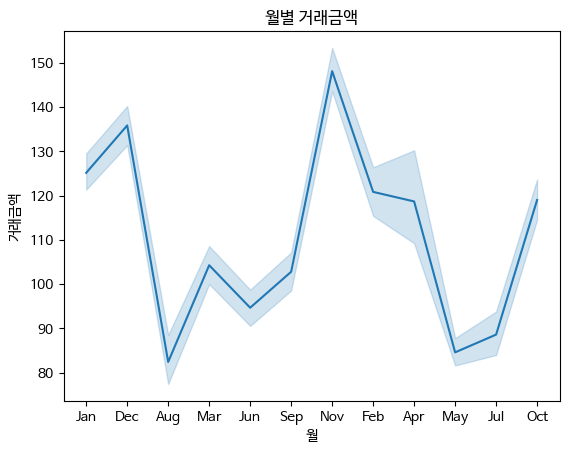

In [32]:
sns.lineplot(x='월', y='거래금액', data=df)
plt.xlabel('월')
plt.ylabel('거래금액')
plt.title('월별 거래금액')
plt.show()

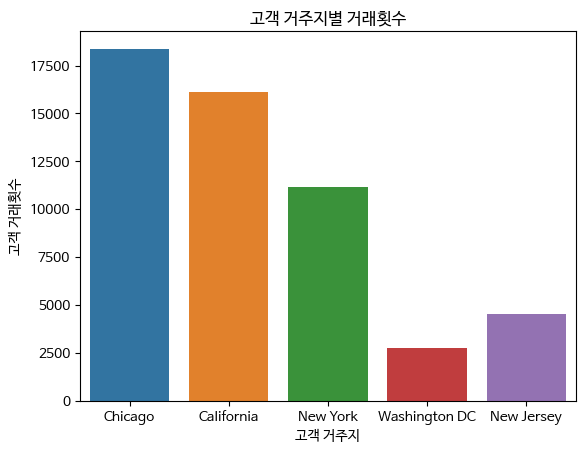

In [33]:
sns.countplot(x='고객지역', data=df)
plt.xlabel('고객 거주지')
plt.ylabel('고객 거래횟수')
plt.title('고객 거주지별 거래횟수')
plt.show()

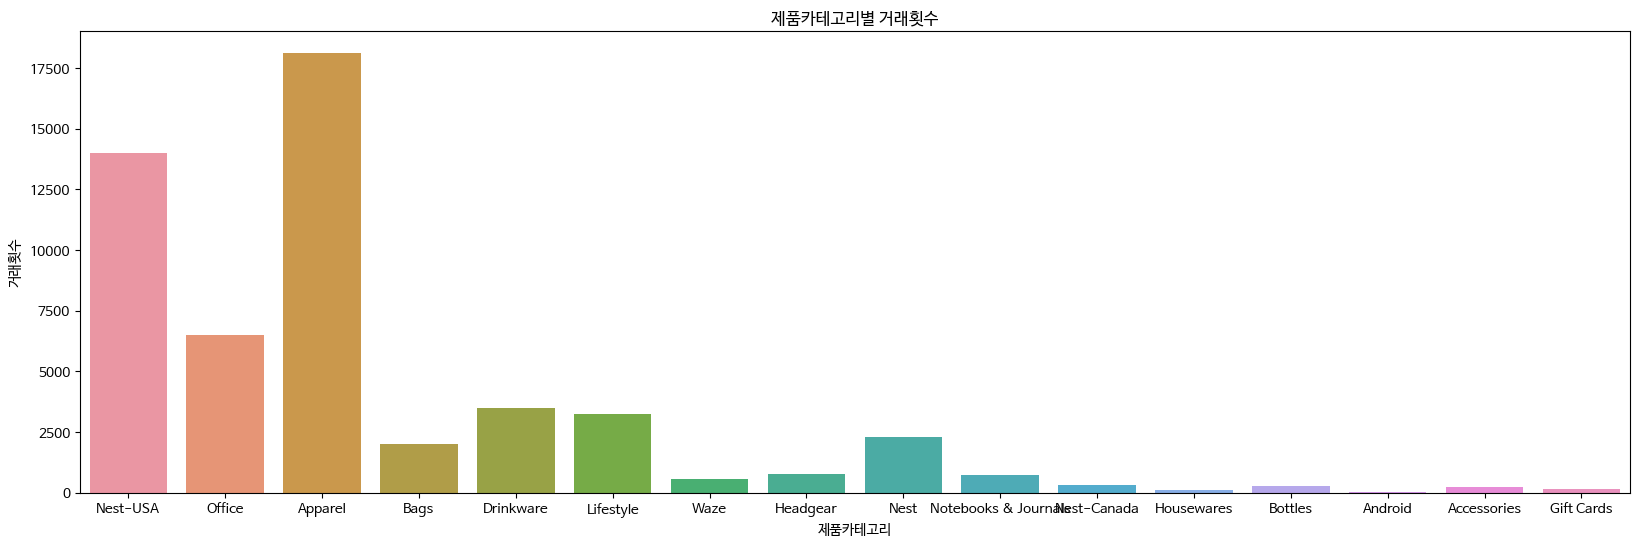

In [34]:
plt.figure(figsize=(20, 6))
sns.countplot(x='제품카테고리', data=df)
plt.xlabel('제품카테고리')
plt.ylabel('거래횟수')
plt.title('제품카테고리별 거래횟수')
plt.show()

In [ ]:
coupon_status_counts = df['쿠폰상태'].value_counts()
jender_counts = df['성별'].value_counts()

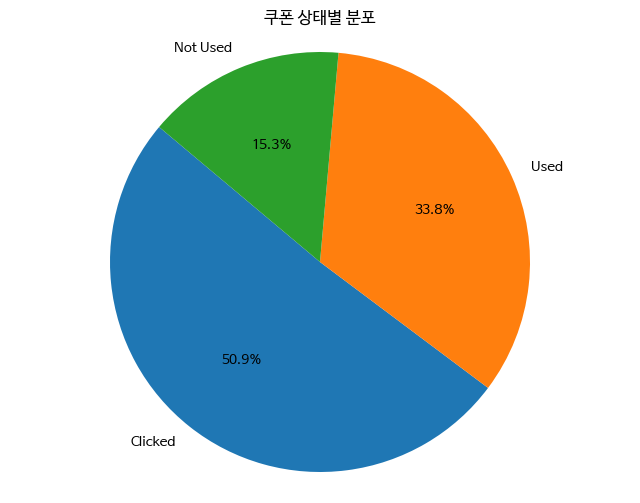

In [36]:
plt.figure(figsize=(8, 6))
plt.pie(coupon_status_counts, labels=coupon_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('쿠폰 상태별 분포')
plt.axis('equal') 
plt.show()

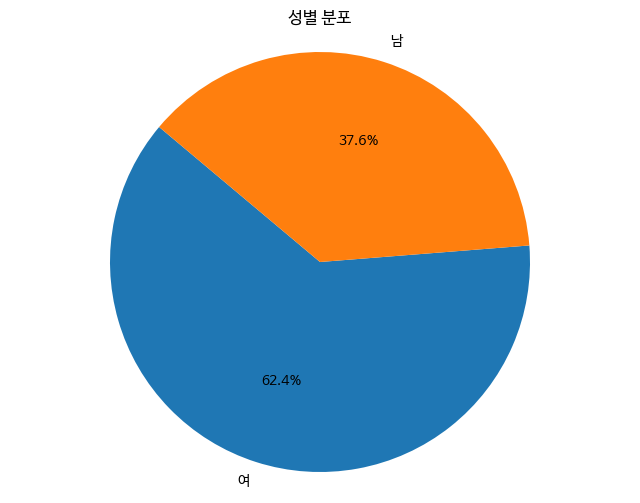

In [37]:
plt.figure(figsize=(8, 6))
plt.pie(jender_counts, labels=jender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('성별 분포')
plt.axis('equal')
plt.show()

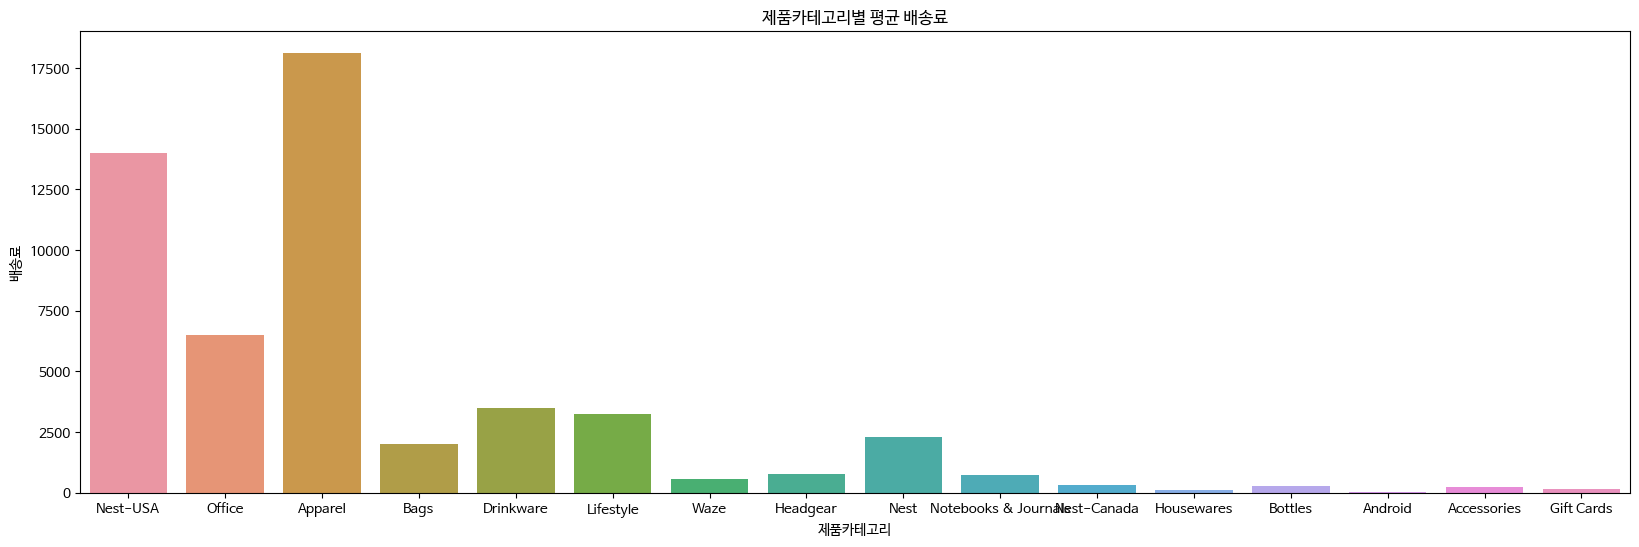

In [38]:
transaction_by_category = df.groupby('제품카테고리')['배송료'].mean()
plt.figure(figsize=(20, 6))
sns.countplot(x='제품카테고리', data=df)
plt.xlabel('제품카테고리')
plt.ylabel('배송료')
plt.title('제품카테고리별 평균 배송료')
plt.show()

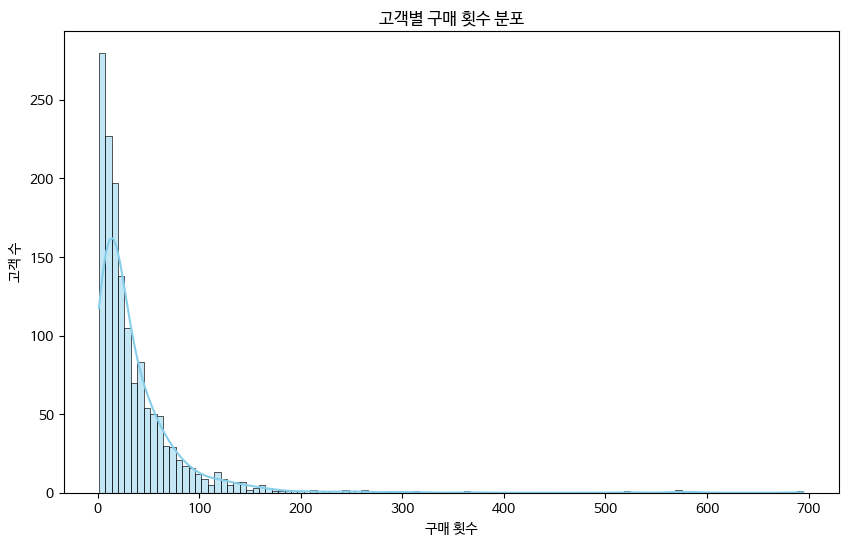

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df.groupby('고객ID').size(), kde=True, color='skyblue')
plt.title('고객별 구매 횟수 분포')
plt.xlabel('구매 횟수')
plt.ylabel('고객 수')
plt.show()

In [46]:
buy_count = df['고객ID'].value_counts().reset_index()
buy_count.columns = ['고객ID', 'count']
categories = ['0-50', '51-100', '101-150', '151-200', '201+']

category_counts = [buy_count[(buy_count['count'] >= i * 50) & (buy_count['count'] < (i + 1) * 50)].shape[0] for i in range(len(categories) - 1)]
category_counts.append(buy_count[buy_count['count'] >= 200].shape[0])

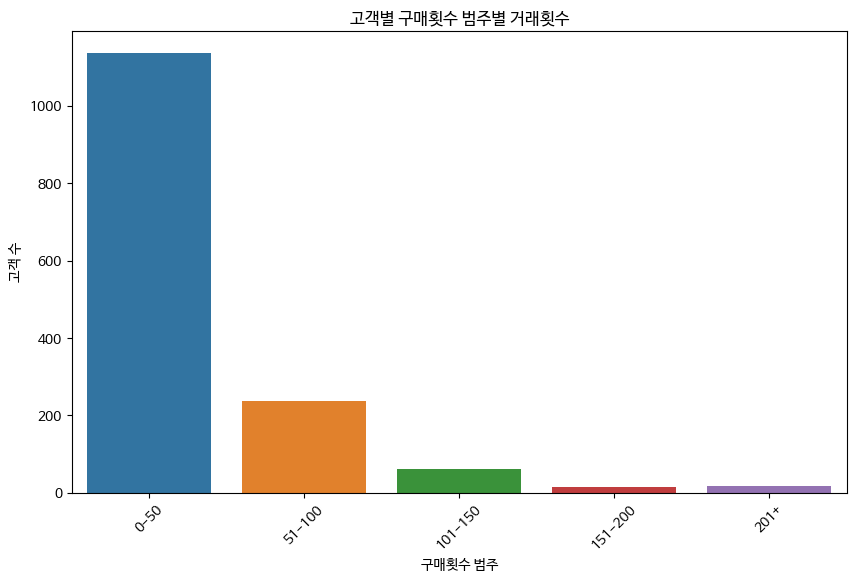

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=category_counts)
plt.title('고객별 구매횟수 범주별 거래횟수')
plt.xlabel('구매횟수 범주')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.show()

In [ ]:
not_used = df[(df['쿠폰상태'] == 'Not Used') | (df['쿠폰상태'] == 'Clicked')]